<a href="https://colab.research.google.com/github/tikhomirno/bochkarevatikhomirova/blob/main/ElectivePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import io
import requests
import collections
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, validation_curve, learning_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score, precision_recall_curve, plot_precision_recall_curve, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

**Препроцессинг**

In [ ]:


url = 'https://raw.githubusercontent.com/tikhomirno/bochkarevatikhomirova/main/%D0%BC%D0%BB%20-%20%D0%9B%D0%B8%D1%81%D1%821%20(3).csv'

df = pd.read_csv(url, error_bad_lines=False)


df.head()

,республика,фио,пол,год рождения,был срок до,два срока до,партия,год кампании,религия,национальность,национальнось региона,избран,Unnamed: 12,путинская рука
0,Коми,Спиридонов Юрий Алексеевич,М,1938,0,0,Единая Россия,1994,0,0,коми,1,NaN,NaN
1,Коми,Худяев Вячеслав Иванович,М,1945,0,0,0,1994,0,0,коми,0,NaN,NaN
2,Коми,Спиридонов Юрий Алексеевич,М,1938,1,0,Единая Россия,1997,0,0,коми,1,NaN,NaN
3,Коми,Рита Васильевна Чистоходова,Ж,1939,0,0,КПРФ,1997,0,0,коми,0,NaN,NaN
4,Коми,Василий Павлович Кузнецов,М,1945,0,0,0,1997,0,0,коми,0,NaN,NaN


In [ ]:
df.drop (['Unnamed: 12'], axis=1, inplace=True)
del df['национальнось региона']
df=df.fillna(0)
df.drop (['фио'], axis=1, inplace=True)
df['пол'].replace('Ж', 0, inplace=True)
df['пол'].replace( 'М', 1, inplace=True)
df['партия'].replace('0', 'беспартийный', inplace=True)
df.replace('0', 0, inplace=True)
df['внвв'] = df['год кампании'] -  df['год рождения']
df.replace('0 (не совпадает)', 0, inplace=True)

y = df['избран']

df.head(10)

,республика,пол,год рождения,был срок до,два срока до,партия,год кампании,религия,национальность,избран,путинская рука,внвв
0,Коми,1,1938,0,0,Единая Россия,1994,0,0,1,0.0,56
1,Коми,1,1945,0,0,беспартийный,1994,0,0,0,0.0,49
2,Коми,1,1938,1,0,Единая Россия,1997,0,0,1,0.0,59
3,Коми,0,1939,0,0,КПРФ,1997,0,0,0,0.0,58
4,Коми,1,1945,0,0,беспартийный,1997,0,0,0,0.0,52
5,Коми,1,1938,1,1,Единая Россия,2001,0,0,0,0.0,63
6,Коми,1,1949,0,0,Единая Россия,2001,0,1,1,0.0,52
7,Коми,1,1949,1,0,Единая Россия,2005,0,1,1,1.0,56
8,Коми,1,1966,0,0,Единая Россия,2010,0,1,1,1.0,44
9,Коми,1,1966,1,0,Единая Россия,2014,0,1,1,0.0,48


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
республика,145,9,Алтай,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
пол,145,NaN,NaN,NaN,0.965517,0.183098,0,1,1,1,1
год рождения,145,NaN,NaN,NaN,1955,11.592,1935,1945,1954,1963,1990
был срок до,145,NaN,NaN,NaN,0.227586,0.420727,0,0,0,0,1
два срока до,145,NaN,NaN,NaN,0.0758621,0.265695,0,0,0,0,1
партия,145,13,беспартийный,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
год кампании,145,NaN,NaN,NaN,2004.61,8.6957,1990,1997,2002,2014,2020
религия,145,NaN,NaN,NaN,0.413793,0.494219,0,0,0,1,1
национальность,145,NaN,NaN,NaN,0.648276,0.479164,0,0,1,1,1
избран,145,NaN,NaN,NaN,0.455172,0.499713,0,0,0,1,1


**Немного визуализации**

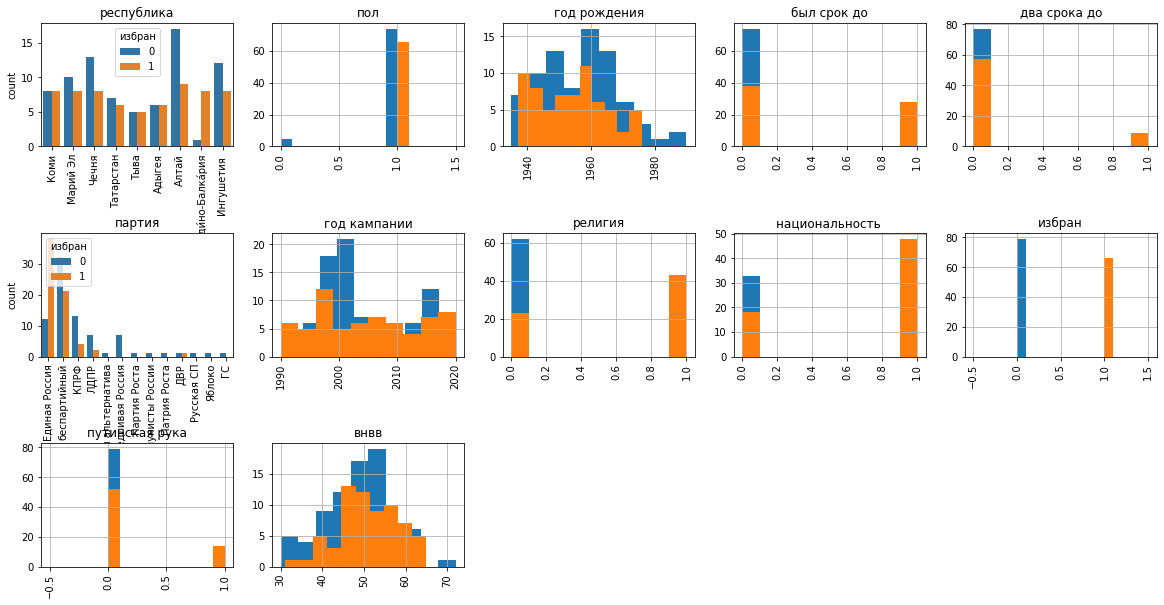

In [ ]:
fig = plt.figure(figsize=(20, 10))
cols = 5
rows = np.ceil(float(df.shape[1]) / cols)
for i, column in enumerate(df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        #data_train[column].value_counts().plot(kind="bar", axes=ax)
        sns.countplot(x=column, data=df, axes = ax, hue  = 'избран')
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    else:
        df[df['избран']==0][column].hist(axes=ax)
        df[df['избран']==1][column].hist(axes=ax)

        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

**Еще немного препроцессинга**

In [ ]:
corrs = abs(df.corr())

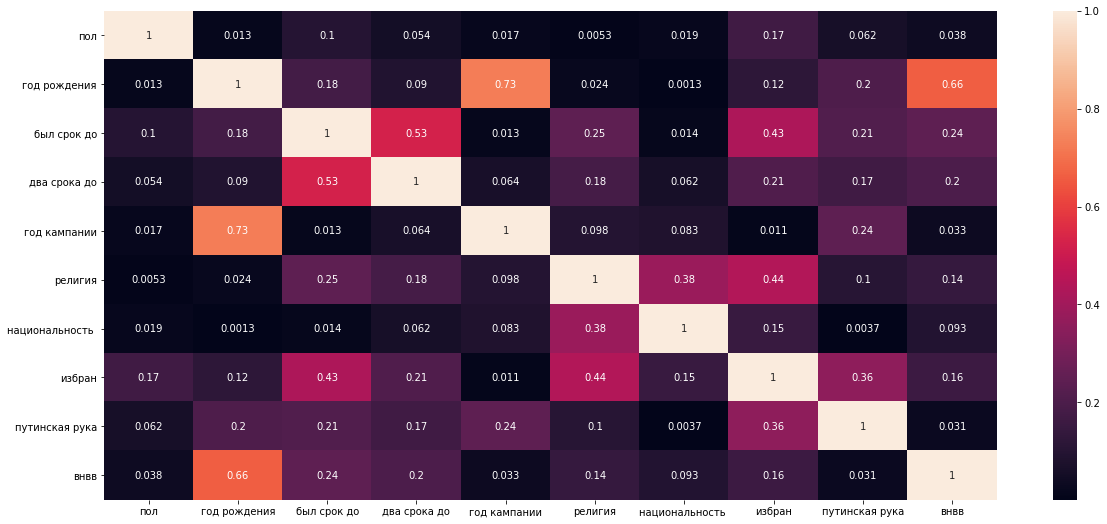

In [ ]:
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrs, annot=True)

In [ ]:
df.drop(['год рождения'], axis=1, inplace=True)
corrs = abs(df.corr())

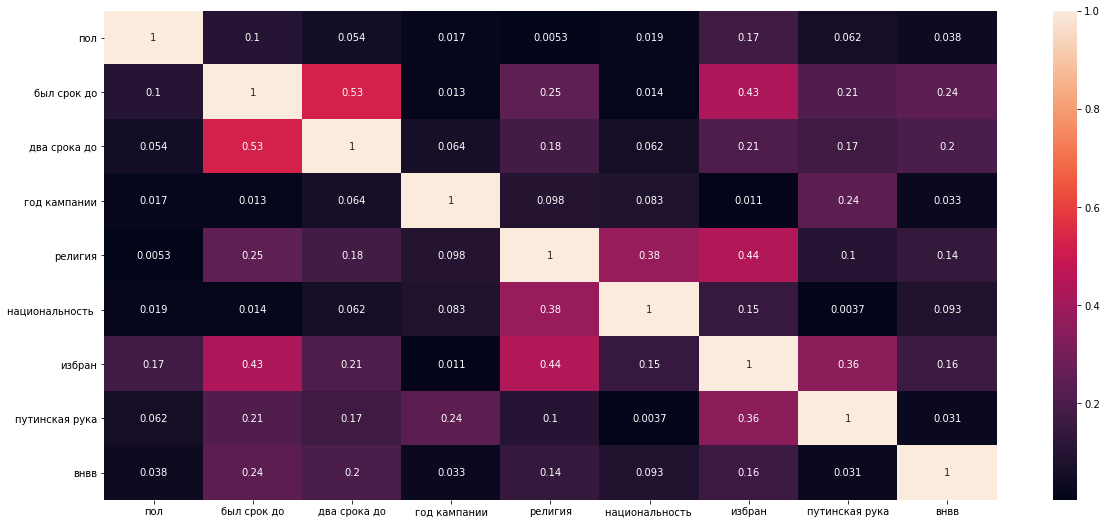

In [ ]:
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrs, annot=True)

In [ ]:
df.dtypes[df.columns]

республика          object
пол                  int64
был срок до          int64
два срока до         int64
партия              object
год кампании         int64
религия              int64
национальность       int64
избран               int64
путинская рука     float64
внвв                 int64
dtype: object

In [ ]:
df['путинская рука'] = df['путинская рука'].astype('int')


In [ ]:
df.dtypes[df.columns]

республика         object
пол                 int64
был срок до         int64
два срока до        int64
партия             object
год кампании        int64
религия             int64
национальность      int64
избран              int64
путинская рука      int64
внвв                int64
dtype: object



---



In [ ]:
df = pd.concat([df, pd.get_dummies(df['партия'], 
                                                   prefix="партия"),
                      pd.get_dummies(df['республика'], prefix="республика")],
                     axis=1)

df.drop(['республика'], axis=1, inplace=True)
df.drop(['партия'], axis=1, inplace=True)

df.head(10)



,пол,был срок до,два срока до,год кампании,религия,национальность,избран,путинская рука,внвв,партия_ГС,партия_ДВР,партия_Единая Россия,партия_Зеленая альтернатива,партия_КПРФ,партия_Коммунисты России,партия_ЛДПР,партия_Партия Роста,партия_Патрия Роста,партия_Русская СП,партия_Справедливая Россия,партия_Яблоко,партия_беспартийный,республика_Адыгея,республика_Алтай,республика_Ингушетия,республика_Кабарди́но-Балка́рия,республика_Коми,республика_Марий Эл,республика_Татарстан,республика_Тыва,республика_Чечня
0,1,0,0,1994,0,0,1,0,56,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,1994,0,0,0,0,49,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,1,1,0,1997,0,0,1,0,59,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1997,0,0,0,0,58,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1997,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
5,1,1,1,2001,0,0,0,0,63,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,1,0,0,2001,0,1,1,0,52,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,1,1,0,2005,0,1,1,1,56,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,1,0,0,2010,0,1,1,1,44,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,1,1,0,2014,0,1,1,0,48,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df.dtypes[df.columns]

пол                                int64
был срок до                        int64
два срока до                       int64
год кампании                       int64
религия                            int64
национальность                     int64
избран                             int64
путинская рука                     int64
внвв                               int64
партия_ГС                          uint8
партия_ДВР                         uint8
партия_Единая Россия               uint8
партия_Зеленая альтернатива        uint8
партия_КПРФ                        uint8
партия_Коммунисты России           uint8
партия_ЛДПР                        uint8
партия_Партия Роста                uint8
партия_Патрия Роста                uint8
партия_Русская СП                  uint8
партия_Справедливая Россия         uint8
партия_Яблоко                      uint8
партия_беспартийный                uint8
республика_Адыгея                  uint8
республика_Алтай                   uint8
республика_Ингуш

**Делим на тест и трейн**

In [ ]:

df.drop (['избран'], axis=1, inplace=True)

X = df

y=y.astype('int')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Построение модели и кроссвалидация**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression())])

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

param_grid = [
    {
        'classifier' : [LogisticRegression()],
        'scaler' : [StandardScaler()],
        'classifier__penalty' : ['l1', 'l2', 'elasticnet'], 
        'classifier__C' : np.logspace(0.01, 1, 5)
    },
    {
        'classifier' : [RandomForestClassifier()],
        'scaler' : [StandardScaler()],
        'classifier__max_depth': [3, 4, 5, 6, 7],
        'classifier__n_estimators': [80,90, 100, 110, 130],
        'classifier__min_samples_split': [3, 5, 7]
    },
    {
        'classifier' : [XGBClassifier()], 
        'scaler' : [StandardScaler()],
        'classifier__min_child_weight': [1, 5, 10],
        'classifier__gamma': [0.5, 1, 1.5, 2, 5],
        'classifier__colsample_bytree': [0.6, 0.8, 1.0],
        'classifier__max_depth': [3, 4, 5]
      
    }]

In [ ]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
      

In [ ]:
est = grid.best_estimator_
est

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.6, gamma=1.5,
                               learning_rate=0.1, max_delta_step=0, max_depth=5,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

In [ ]:
score = grid.best_score_
score

0.894191919191919

In [ ]:
roc_auc_score(y_test, est.predict(X_test))

0.6947368421052632

**Достаем важность признаков для полного списка республик**

In [ ]:
randomForest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=7, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=3,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=130, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False)
randomForest.fit(X_train_scaled, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

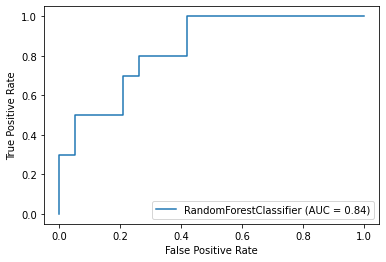

In [ ]:
plot_roc_curve(randomForest, X_test_scaled, y_test)

In [ ]:
feature_scores = pd.Series(randomForest.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

год кампании                       0.190792
был срок до                        0.135066
партия_Единая Россия               0.112948
религия                            0.105027
внвв                               0.089704
путинская рука                     0.073678
национальность                     0.033642
республика_Кабарди́но-Балка́рия    0.026532
партия_беспартийный                0.023937
два срока до                       0.020425
республика_Коми                    0.018503
республика_Марий Эл                0.017878
партия_КПРФ                        0.016713
республика_Алтай                   0.016439
республика_Ингушетия               0.015540
партия_Справедливая Россия         0.014797
республика_Чечня                   0.014661
республика_Адыгея                  0.013292
партия_ДВР                         0.012986
пол                                0.012193
партия_ЛДПР                        0.010354
республика_Тыва                    0.010059
партия_Партия Роста             

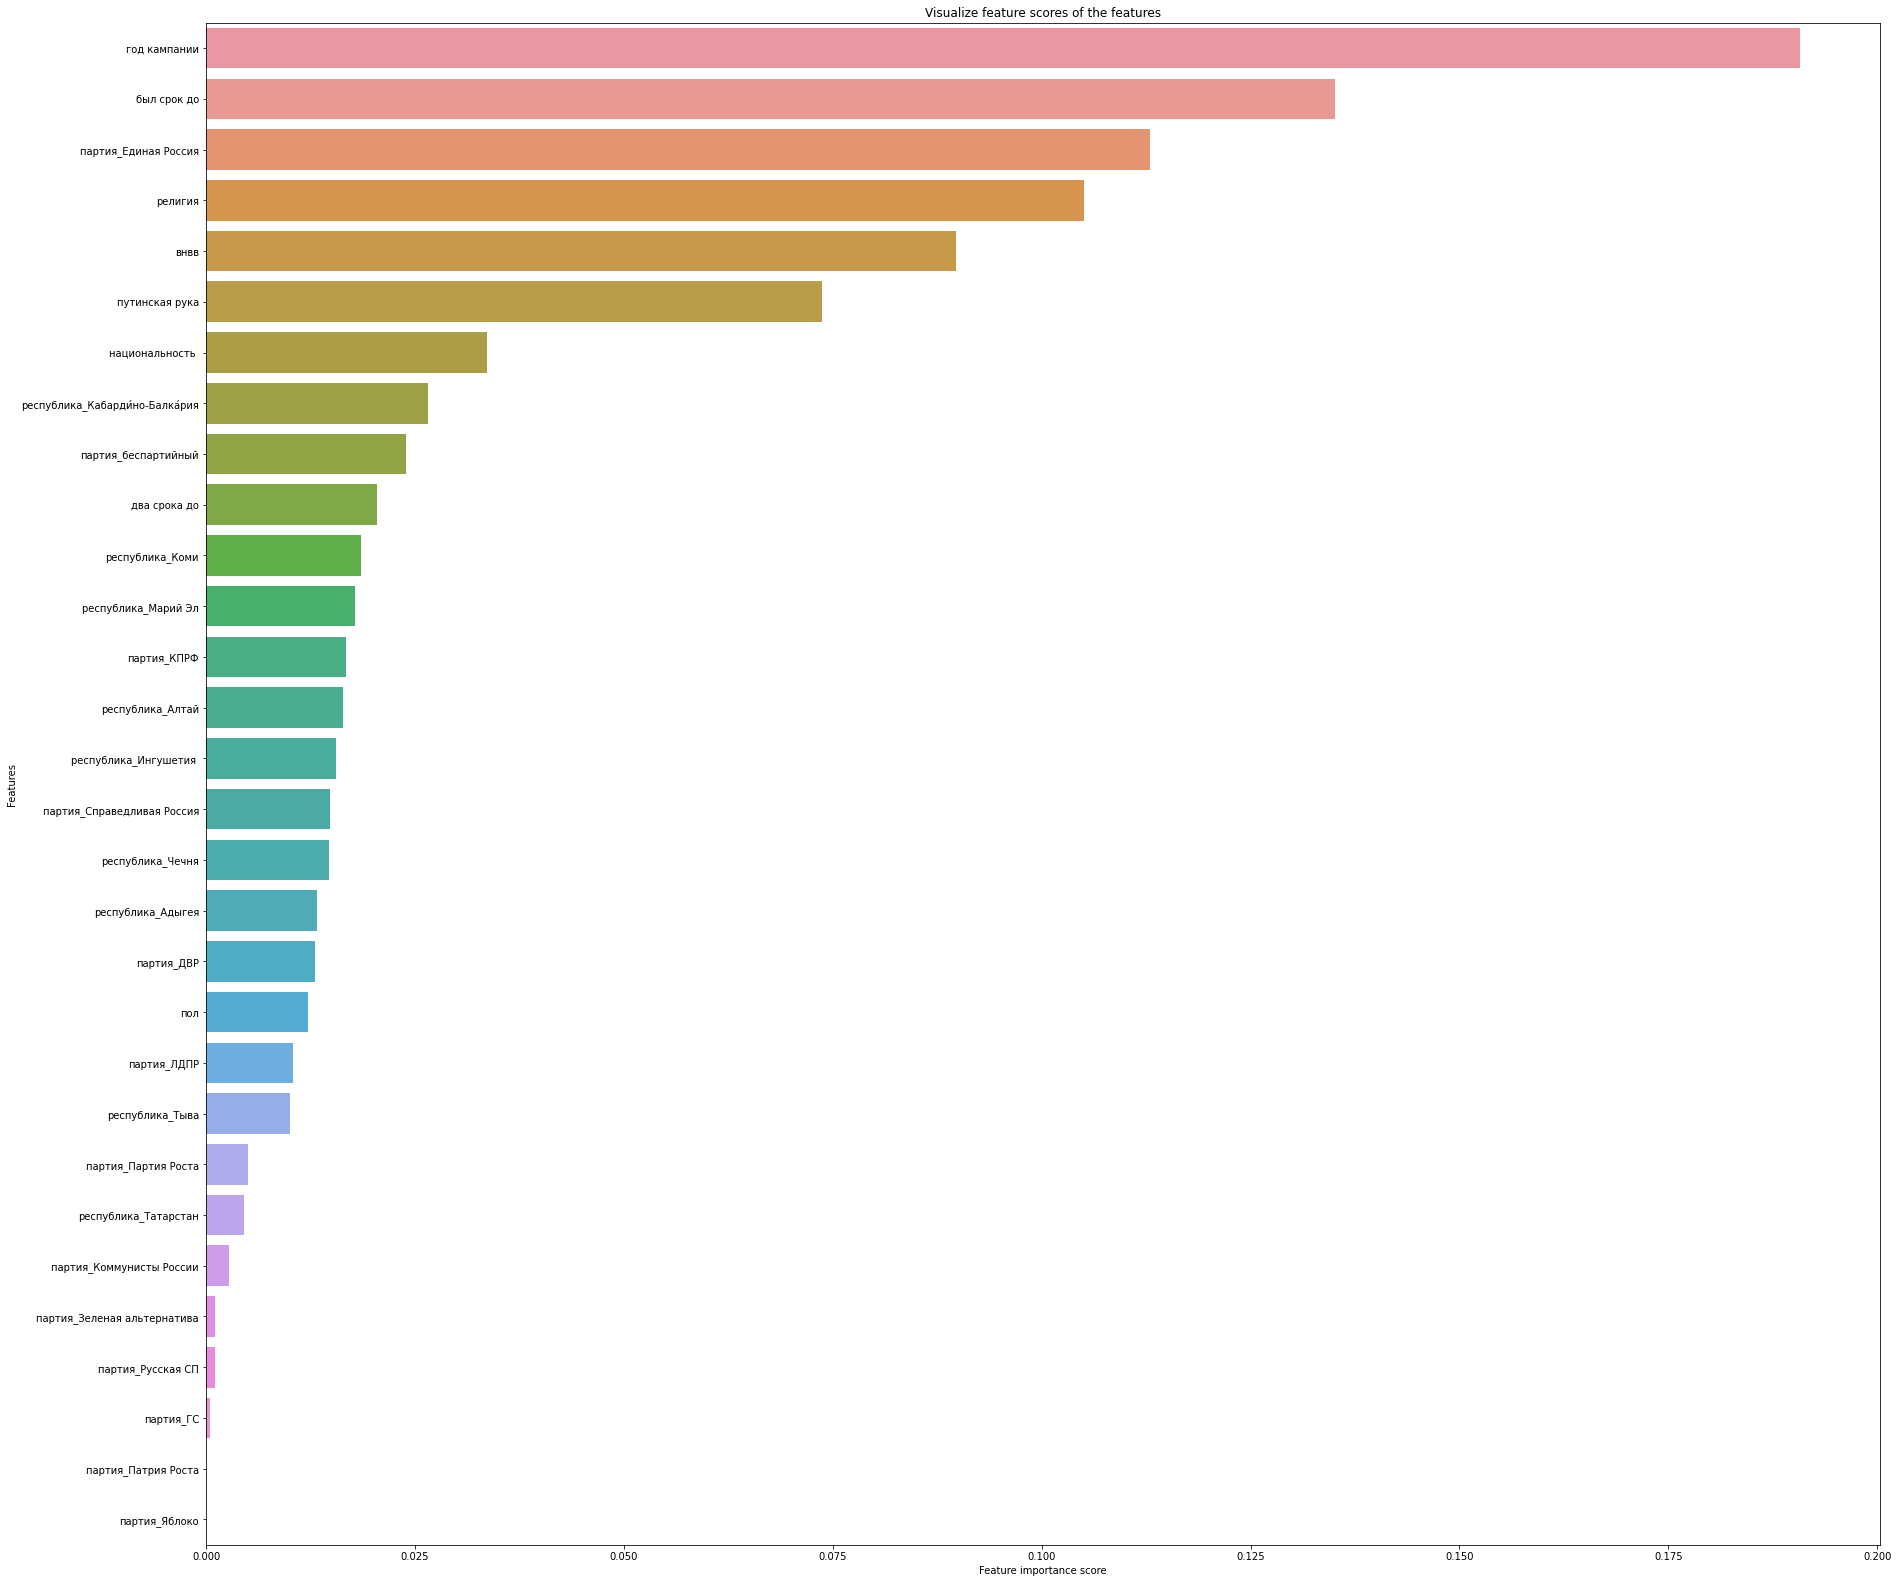

In [ ]:

f, ax = plt.subplots(figsize=(30, 28))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(randomForest, X_train_scaled, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{X_train.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}")

был срок до0.095
партия_Единая Россия0.092
год кампании0.091
религия 0.044
внвв    0.032
путинская рука0.022
национальность 0.018
республика_Коми0.017
республика_Адыгея0.016


**Посмотрим республики по-отдельности! **

In [ ]:
#Алтай

url = 'https://raw.githubusercontent.com/tikhomirno/bochkarevatikhomirova/main/%D0%BC%D0%BB%20-%20%D0%9B%D0%B8%D1%81%D1%828.csv'

df = pd.read_csv(url, error_bad_lines=False)

In [ ]:
df.drop (['Unnamed: 12'], axis=1, inplace=True)
del df['национальнось региона']
df=df.fillna(0)

df['пол'].replace('Ж', 0, inplace=True)
  
df['пол'].replace( 'М', 1, inplace=True)
df['партия'].replace('0', 'беспартийный', inplace=True)
df.replace('0', 0, inplace=True)
df['внвв'] = df['год кампании'] -  df['год рождения']
df.replace('0 (не совпадает)', 0, inplace=True)
df.drop(['год рождения'], axis=1, inplace=True)

y = df['избран']

df.head(10)

,республика,фио,пол,был срок до,два срока до,партия,год кампании,религия,национальность,избран,путинская рука,внвв
0,Алтай,Валерий Иванович Чаптынов,1,0,0,КПРФ,1990,0,1,1,0.0,45
1,Алтай,Валерий Иванович Чаптынов,1,1,0,КПРФ,1994,0,1,1,0.0,49
2,Алтай,Владилен Владимирович Волков,1,0,0,беспартийный,1997,0,0,1,0.0,58
3,Алтай,Семён Иванович Зуба́кин,1,0,0,ДВР,1997,0,0,1,0.0,45
4,Алтай,Юрий Васильевич Антарадонов,1,0,0,Русская СП,1997,0,1,0,0.0,48
5,Алтай,Виктор Васильевич Ромашкин,1,0,0,КПРФ,1997,0,0,0,0.0,38
6,Алтай,Владимир Иванович Петров,1,0,0,беспартийный,1997,0,0,0,0.0,55
7,Алтай,Владилен Владимирович Волков,1,1,0,беспартийный,1997,0,0,0,0.0,58
8,Алтай,Бронтой Янгович Бедюров,1,0,0,беспартийный,1997,0,1,0,0.0,50
9,Алтай,Михаи́л Ива́нович Лапши́н,1,0,0,КПРФ,2001,0,1,1,0.0,49


In [ ]:
def visualize (df):
  fig = plt.figure(figsize=(25, 15))
  cols = 5
  rows = np.ceil(float(df.shape[1]) / cols)
  for i, column in enumerate(df.columns):
      ax = fig.add_subplot(rows, cols, i + 1)
      ax.set_title(column)
      if df.dtypes[column] == np.object:
          #data_train[column].value_counts().plot(kind="bar", axes=ax)
          sns.countplot(x=column, data=df, axes = ax, hue  = 'избран')
          ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
      else:
          df[df['избран']==0][column].hist(axes=ax)
          df[df['избран']==1][column].hist(axes=ax)

          plt.xticks(rotation="vertical")
  plt.subplots_adjust(hspace=0.7, wspace=0.2)

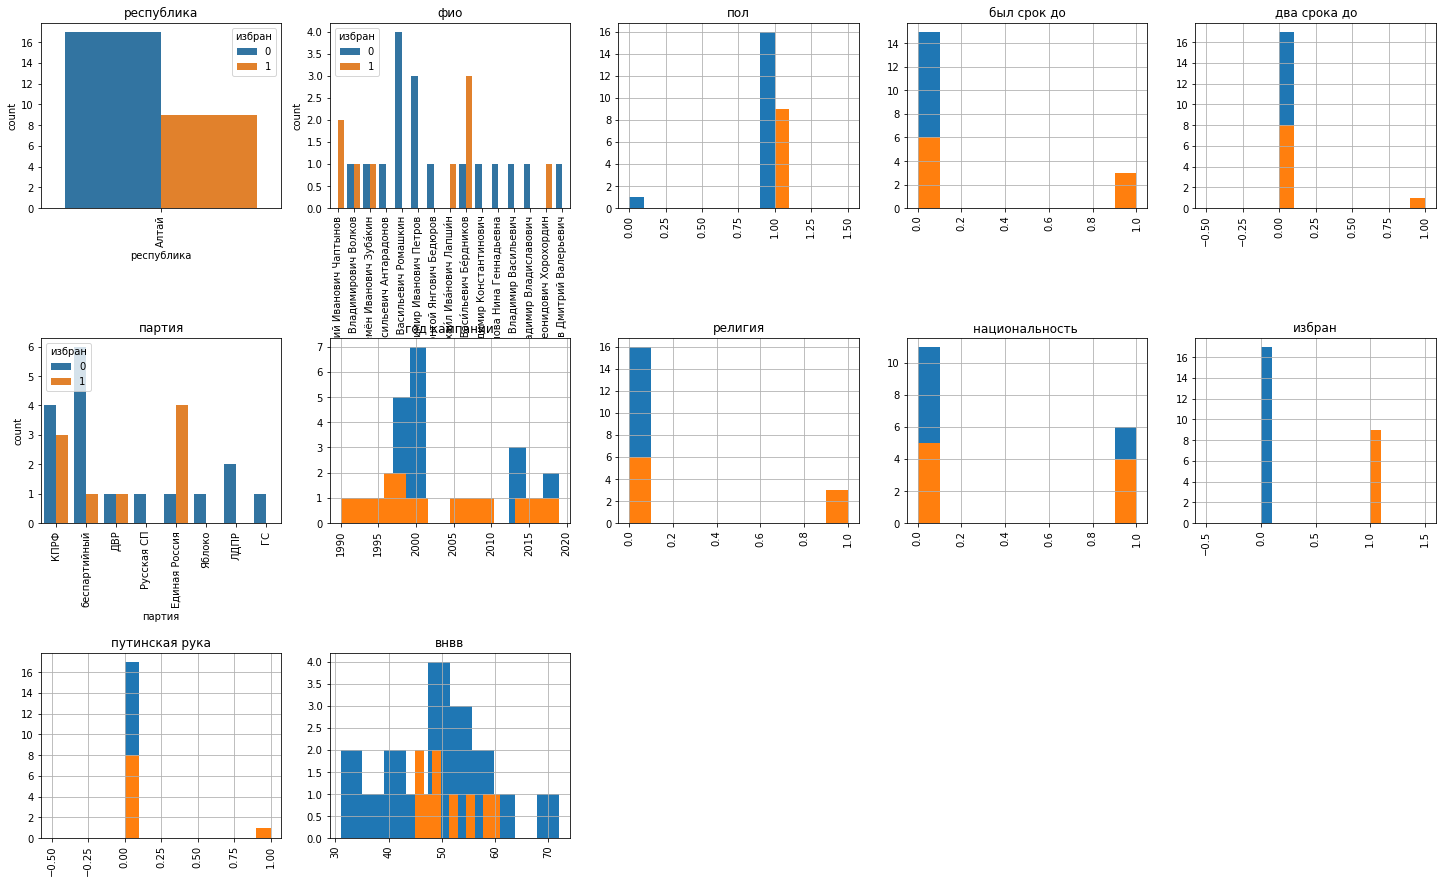

In [ ]:
visualize (df)

In [ ]:

df = pd.concat([df, pd.get_dummies(df['партия'], 
                                                     prefix="партия"),  
                        pd.get_dummies(df['республика'], prefix="республика")],
                       axis=1)

df.drop(['республика'], axis=1, inplace=True)
df.drop(['партия'], axis=1, inplace=True)

df.head(10)


,фио,пол,был срок до,два срока до,год кампании,религия,национальность,избран,путинская рука,внвв,партия_ГС,партия_ДВР,партия_Единая Россия,партия_КПРФ,партия_ЛДПР,партия_Русская СП,партия_Яблоко,партия_беспартийный,республика_Алтай
0,Валерий Иванович Чаптынов,1,0,0,1990,0,1,1,0.0,45,0,0,0,1,0,0,0,0,1
1,Валерий Иванович Чаптынов,1,1,0,1994,0,1,1,0.0,49,0,0,0,1,0,0,0,0,1
2,Владилен Владимирович Волков,1,0,0,1997,0,0,1,0.0,58,0,0,0,0,0,0,0,1,1
3,Семён Иванович Зуба́кин,1,0,0,1997,0,0,1,0.0,45,0,1,0,0,0,0,0,0,1
4,Юрий Васильевич Антарадонов,1,0,0,1997,0,1,0,0.0,48,0,0,0,0,0,1,0,0,1
5,Виктор Васильевич Ромашкин,1,0,0,1997,0,0,0,0.0,38,0,0,0,1,0,0,0,0,1
6,Владимир Иванович Петров,1,0,0,1997,0,0,0,0.0,55,0,0,0,0,0,0,0,1,1
7,Владилен Владимирович Волков,1,1,0,1997,0,0,0,0.0,58,0,0,0,0,0,0,0,1,1
8,Бронтой Янгович Бедюров,1,0,0,1997,0,1,0,0.0,50,0,0,0,0,0,0,0,1,1
9,Михаи́л Ива́нович Лапши́н,1,0,0,2001,0,1,1,0.0,49,0,0,0,1,0,0,0,0,1


In [ ]:
y = df['избран']
df.drop (['фио'], axis=1, inplace=True)
df.drop (['избран'], axis=1, inplace=True)

X = df

y=y.astype('int')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
randomForest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=7, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=3,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=130, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False)
randomForest.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
roc_auc_score(y_test, randomForest.predict(X_test))

0.75

In [ ]:
randomForest.score(X_train_scaled, y_train)

0.95

In [ ]:
feature_scores = pd.Series(randomForest.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

внвв                    0.222466
год кампании            0.191675
партия_Единая Россия    0.136770
партия_КПРФ             0.088537
партия_беспартийный     0.085125
национальность          0.062398
партия_ДВР              0.061071
религия                 0.054827
был срок до             0.047379
партия_Русская СП       0.022916
партия_ГС               0.011475
партия_Яблоко           0.006445
пол                     0.004635
партия_ЛДПР             0.004280
путинская рука          0.000000
два срока до            0.000000
республика_Алтай        0.000000
dtype: float64

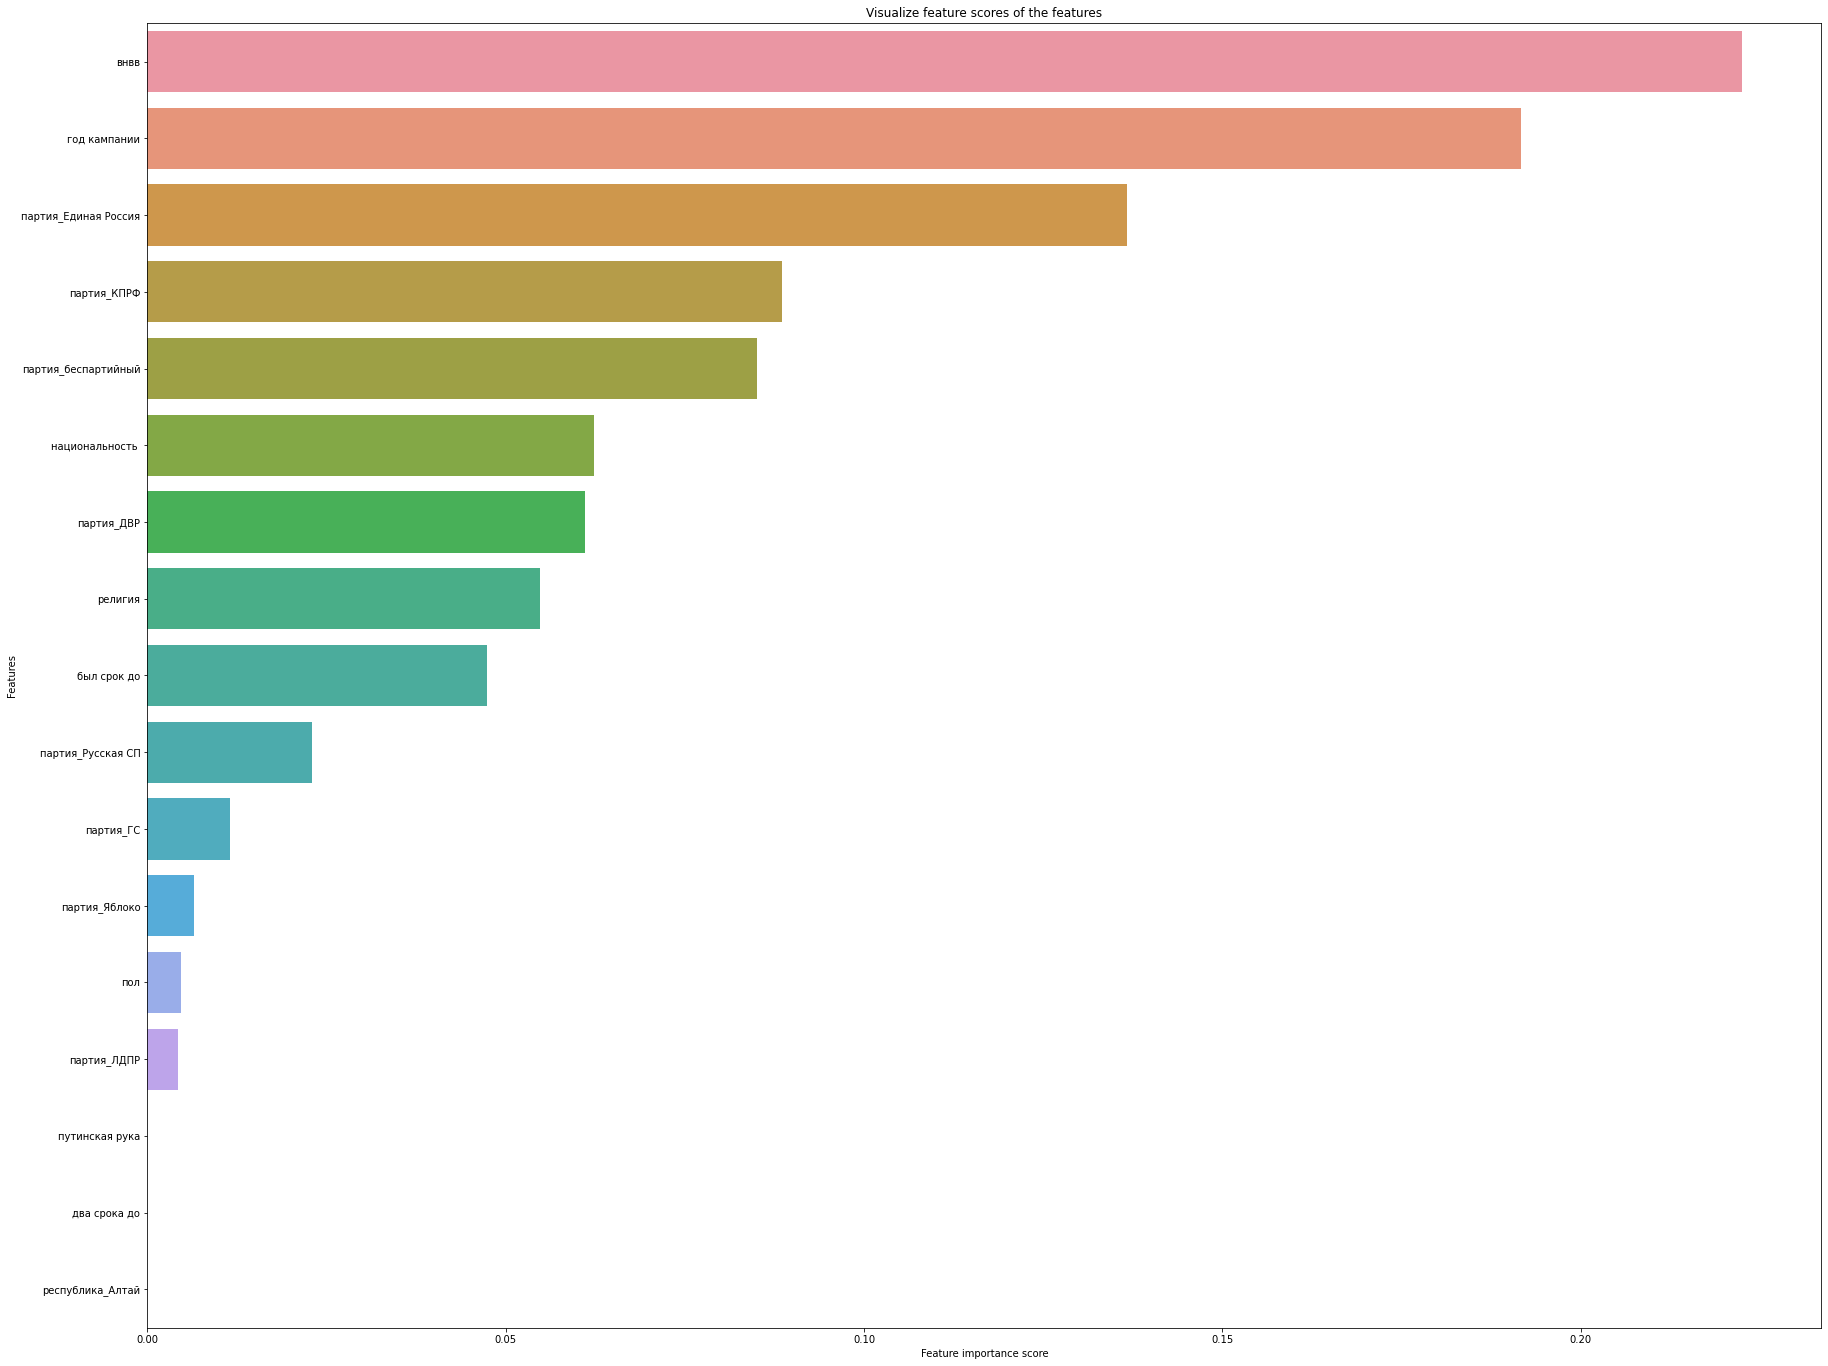

In [ ]:

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(randomForest, X_train_scaled, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{X_train.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}")

партия_Единая Россия0.088
партия_ДВР0.047


In [ ]:
#Коми

In [ ]:
url = 'https://raw.githubusercontent.com/tikhomirno/bochkarevatikhomirova/main/%D0%BC%D0%BB%20-%20%D0%9B%D0%B8%D1%81%D1%822.csv'

df = pd.read_csv(url, error_bad_lines=False)
df=df.fillna(0)
visualize (df)
#коми

In [ ]:
url = 'https://raw.githubusercontent.com/tikhomirno/bochkarevatikhomirova/main/%D0%BC%D0%BB%20-%20%D0%9B%D0%B8%D1%81%D1%8210.csv'

df = pd.read_csv(url, error_bad_lines=False)
df=df.fillna(0)
visualize (df)
#Ингушетия

In [ ]:
url = 'https://raw.githubusercontent.com/tikhomirno/bochkarevatikhomirova/main/%D0%BC%D0%BB%20-%20%D0%9B%D0%B8%D1%81%D1%823.csv'

df = pd.read_csv(url, error_bad_lines=False)
df=df.fillna(0)
visualize (df)

#Марий Эл

In [ ]:
url = 'https://raw.githubusercontent.com/tikhomirno/bochkarevatikhomirova/main/%D0%BC%D0%BB%20-%20%D0%9B%D0%B8%D1%81%D1%824.csv'

df = pd.read_csv(url, error_bad_lines=False)
df=df.fillna(0)
visualize (df)

#Чечня

In [ ]:


url = 'https://raw.githubusercontent.com/tikhomirno/bochkarevatikhomirova/main/%D0%BC%D0%BB%20-%20%D0%9B%D0%B8%D1%81%D1%825.csv'
df = pd.read_csv(url, error_bad_lines=False)
df=df.fillna(0)
visualize (df)

#Татарстан

In [ ]:

url = 'https://raw.githubusercontent.com/tikhomirno/bochkarevatikhomirova/main/%D0%BC%D0%BB%20-%20%D0%9B%D0%B8%D1%81%D1%826.csv'
df = pd.read_csv(url, error_bad_lines=False)
df=df.fillna(0)
visualize (df)

#Адыгея

In [ ]:
url = 'https://raw.githubusercontent.com/tikhomirno/bochkarevatikhomirova/main/%D0%BC%D0%BB%20-%20%D0%9B%D0%B8%D1%81%D1%827.csv'
df = pd.read_csv(url, error_bad_lines=False)
df=df.fillna(0)
visualize (df)

#Тыва

In [ ]:
url = 'https://raw.githubusercontent.com/tikhomirno/bochkarevatikhomirova/main/%D0%BC%D0%BB%20-%20%D0%9B%D0%B8%D1%81%D1%829.csv'
df = pd.read_csv(url, error_bad_lines=False)
df=df.fillna(0)
visualize (df)

#Кабардино-Балкария